# Problem Set 1
Plot the Moment-Capacity Curve and comment on As = atleast twice Asb

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import math

def centroid_of_tbeam(bf, tf, bw, y):
    # Calculate centroid of t-beam from top of flange
    # y - height of beam
    kd_prime = 0
    if (y <= tf):
        kd_prime = y / 2
    else:
        a_total = bf * tf + bw * (y - tf)
        ay = bf * tf * tf / 2
        ay += bw * (y - tf) * ((y - tf) / 2 + tf)
        kd_prime = ay / a_total
    return kd_prime

def area_of_tbeam(bf, tf, bw, y):
    # Calculate the area of t-beam
    area = 0
    if (y <= tf):
        area = bf * y
    else:
        area = bf * tf + bw * (y - tf)
    return area

In [2]:
student_number = [3, 3, 8]
d = 435
bw = 250
tf = 125
ϵcu = 0.003
Es = 200000
fc_base = 28        # Basis for calculating β1
student_number_reversed = ['.']

# Reverse the student number then append decimal at the start
for i in range(len(student_number)):
    student_number_reversed.append(str(student_number[len(student_number) - 1 - i]))

# Converted student number
student_number_reversed = float(''.join(student_number_reversed))

# Factor for calculating flange width
α = 10 + 10 * student_number_reversed

# Calculate for b then round to the nearest 25mm
bf = bw + α * tf
bf = int(round(bf / 100 * 4) / 4 * 100)
print('bf = ', bf)
# Given arrays
fcPrime = [20, 40, 20, 40]
fy = [300, 300, 400, 400]
β1 = []

# Calculate for corresponding β1
for fcx in fcPrime:
    if fcx <= fc_base:
        β1.append(0.85)
    else:
        β1.append(round(0.85 - (0.05 / 7)*(fcx - fc_base), 3))

print(β1)
        
# Results array
M = ([0], [0], [0], [0])
As = ([0], [0], [0], [0])
MnMax = []
        
# -------------------------------------
# Start of problem main calculation
# -------------------------------------
for i in range(4):     # 4 cases
    print('= = = = = = = = = = = = =')
    print('Case # ', i+1)
    print('= = = = = = = = = = = = =')
    
    # Calculate balanced value for 'c'
    c_bal = 600 * d / (600 + fy[i])
    
    # Balanced equivalent compression block height
    a_bal = β1[i] * c_bal
    
    # Web component of the compression, z
    z_bal = a_bal - tf if a_bal > tf else 0
    
    # Balanced equation
    # Asb.fy = 0.85 f'c.bf.tf + 0.85f'c.bw.z
    As_bal = (0.85 * fcPrime[i] * bf * tf + 0.85 * fcPrime[i] * bw * z_bal) / fy[i]
    
    print('cb = ', c_bal, 'ab = ', a_bal, 'zb = ', z_bal, 'Asb = ', round(As_bal, 3))
    
    As_limit = 2 * As_bal
    
    As_trial = 100
    Mmax = 0.0
    while (As_trial <= As_limit):
        a = 10
        c = a / β1[i]
        As_calc = 0
        fs = 0.0
        fs_actual = 0.0
        steel_yields = False
        while (As_calc < As_trial):
            c = a / β1[i]
            fs = 600 * (d - c) / c
            fs_actual = fs
            if (fs >= fy[i]):
                fs = fy[i]
                steel_yields = True
            Ac = area_of_tbeam(bf, tf, bw, a)
            
            As_calc = 0.85 * fcPrime[i] * Ac / fs
            # Try for a
            a += 0.02
        
        # Calculate for the strain in concrete
        ϵc = (fs/Es) / (d-c) * c
        
        # Calculate moment
        Mn = As_calc * fs * (d - centroid_of_tbeam(bf, tf, bw, a))
        Mmax = Mn
        M[i].append(Mn/1000**2)
        As[i].append(As_calc)
        
        print('As = ', round(As_trial, 2),'M = ', round(Mn / 1000**2, 2), 'c = ', \
              round(c, 2), 'a = ', round(a, 2), 'fs = ', round(fs, 2), 'fs (actual) = ', fs_actual,
             'ϵc = ', ϵc)
        # Increment steel area each loop
        As_trial += 100
        
    MnMax.append(Mmax)

bf =  2550
[0.85, 0.764, 0.85, 0.764]
= = = = = = = = = = = = =
Case #  1
= = = = = = = = = = = = =
cb =  290.0 ab =  246.5 zb =  121.5 Asb =  19783.75
As =  100 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  200 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  300 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  400 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  500 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  600 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  700 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  800 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  90

As =  7900 M =  966.28 c =  64.33 a =  54.7 fs =  300 fs (actual) =  3457.242136064146 ϵc =  0.00026032310280256905
As =  8000 M =  977.81 c =  65.15 a =  55.4 fs =  300 fs (actual) =  3405.958829902261 ϵc =  0.00026424277125681724
As =  8100 M =  988.99 c =  65.95 a =  56.08 fs =  300 fs (actual) =  3357.3671066711904 ϵc =  0.00026806720010203014
As =  8200 M =  1000.48 c =  66.78 a =  56.78 fs =  300 fs (actual) =  3308.5623678644592 ϵc =  0.0002720214703345347
As =  8300 M =  1011.62 c =  67.58 a =  57.46 fs =  300 fs (actual) =  3262.2910863507395 ϵc =  0.00027587973487882623
As =  8400 M =  1023.07 c =  68.4 a =  58.16 fs =  300 fs (actual) =  3215.7894736839735 ϵc =  0.0002798690671031303
As =  8500 M =  1034.49 c =  69.22 a =  58.86 fs =  300 fs (actual) =  3170.394289598673 ϵc =  0.0002838763629346327
As =  8600 M =  1045.57 c =  70.02 a =  59.54 fs =  300 fs (actual) =  3127.3185483868565 ϵc =  0.0002877864809979914
As =  8700 M =  1056.95 c =  70.85 a =  60.24 fs =  300 fs (a

As =  17100 M =  1927.97 c =  139.22 a =  118.36 fs =  300 fs (actual) =  1274.6831164442435 ϵc =  0.0007060578338172155
As =  17200 M =  1937.57 c =  140.05 a =  119.06 fs =  300 fs (actual) =  1263.6592741936488 ϵc =  0.0007122173028598214
As =  17300 M =  1947.15 c =  140.87 a =  119.76 fs =  300 fs (actual) =  1252.7643226992827 ϵc =  0.0007184112635493999
As =  17400 M =  1956.43 c =  141.67 a =  120.44 fs =  300 fs (actual) =  1242.3019431989064 ϵc =  0.0007244615569726272
As =  17500 M =  1965.96 c =  142.49 a =  121.14 fs =  300 fs (actual) =  1231.654557463776 ϵc =  0.0007307243695450459
As =  17600 M =  1975.21 c =  143.29 a =  121.82 fs =  300 fs (actual) =  1221.4285714286757 ϵc =  0.0007368421052630949
As =  17700 M =  1984.7 c =  144.12 a =  122.52 fs =  300 fs (actual) =  1211.0204081633701 ϵc =  0.0007431749241657597
As =  17800 M =  1994.17 c =  144.94 a =  123.22 fs =  300 fs (actual) =  1200.7305194806254 ϵc =  0.0007495437031027528
As =  17900 M =  2003.35 c =  145.

As =  24500 M =  2159.48 c =  308.87 a =  262.56 fs =  245.01 fs (actual) =  245.0140930904115 ϵc =  0.003
As =  24600 M =  2159.7 c =  309.22 a =  262.86 fs =  244.05 fs (actual) =  244.049611931049 ϵc =  0.0029999999999999996
As =  24700 M =  2159.92 c =  309.58 a =  263.16 fs =  243.09 fs (actual) =  243.08732993827314 ϵc =  0.003
As =  24800 M =  2160.12 c =  309.91 a =  263.44 fs =  242.19 fs (actual) =  242.19117758696171 ϵc =  0.0029999999999999996
As =  24900 M =  2160.34 c =  310.26 a =  263.74 fs =  241.23 fs (actual) =  241.23312604261235 ϵc =  0.003
As =  25000 M =  2160.54 c =  310.59 a =  264.02 fs =  240.34 fs (actual) =  240.34090909074996 ϵc =  0.0029999999999999996
As =  25100 M =  2160.75 c =  310.92 a =  264.3 fs =  239.45 fs (actual) =  239.45058271514398 ϵc =  0.0029999999999999996
As =  25200 M =  2160.95 c =  311.25 a =  264.58 fs =  238.56 fs (actual) =  238.56214091305756 ϵc =  0.0029999999999999996
As =  25300 M =  2161.17 c =  311.6 a =  264.88 fs =  237.61 

As =  31900 M =  2172.03 c =  330.14 a =  280.64 fs =  190.57 fs (actual) =  190.57087876834305 ϵc =  0.0029999999999999996
As =  32000 M =  2172.17 c =  330.38 a =  280.84 fs =  190.01 fs (actual) =  190.00783419974573 ϵc =  0.0030000000000000005
As =  32100 M =  2172.3 c =  330.61 a =  281.04 fs =  189.45 fs (actual) =  189.4455910610375 ϵc =  0.003
As =  32200 M =  2172.43 c =  330.85 a =  281.24 fs =  188.88 fs (actual) =  188.88414764231888 ϵc =  0.0029999999999999996
As =  32300 M =  2172.56 c =  331.08 a =  281.44 fs =  188.32 fs (actual) =  188.3235022385512 ϵc =  0.0029999999999999996
As =  32400 M =  2172.69 c =  331.32 a =  281.64 fs =  187.76 fs (actual) =  187.76365314953924 ϵc =  0.003
As =  32500 M =  2172.82 c =  331.55 a =  281.84 fs =  187.2 fs (actual) =  187.20459867991414 ϵc =  0.0029999999999999996
As =  32600 M =  2172.95 c =  331.79 a =  282.04 fs =  186.65 fs (actual) =  186.64633713911627 ϵc =  0.003
As =  32700 M =  2173.08 c =  332.02 a =  282.24 fs =  186.0

As =  39000 M =  2179.82 c =  344.68 a =  293.0 fs =  157.22 fs (actual) =  157.21892279330365 ϵc =  0.0029999999999999996
As =  39100 M =  2179.9 c =  344.85 a =  293.14 fs =  156.86 fs (actual) =  156.85725982526682 ϵc =  0.0029999999999999996
As =  39200 M =  2180.0 c =  345.04 a =  293.3 fs =  156.44 fs (actual) =  156.44435351876135 ϵc =  0.0029999999999999996
As =  39300 M =  2180.08 c =  345.2 a =  293.44 fs =  156.08 fs (actual) =  156.08342989565276 ϵc =  0.003
As =  39400 M =  2180.18 c =  345.39 a =  293.6 fs =  155.67 fs (actual) =  155.67136725929066 ϵc =  0.003
As =  39500 M =  2180.26 c =  345.55 a =  293.74 fs =  155.31 fs (actual) =  155.31118071626943 ϵc =  0.003
= = = = = = = = = = = = =
Case #  2
= = = = = = = = = = = = =
cb =  290.0 ab =  221.56 zb =  96.56 Asb =  38860.867
As =  100 M =  372.8 c =  13.09 a =  10.02 fs =  300 fs (actual) =  19340.4 ϵc =  4.65347148973134e-05
As =  200 M =  372.8 c =  13.09 a =  10.02 fs =  300 fs (actual) =  19340.4 ϵc =  4.6534714

As =  13700 M =  1690.9 c =  62.07 a =  47.44 fs =  300 fs (actual) =  3605.061155630364 ϵc =  0.00024964902428753125
As =  13800 M =  1702.32 c =  62.51 a =  47.78 fs =  300 fs (actual) =  3575.1256281405294 ϵc =  0.00025173940543960746
As =  13900 M =  1713.73 c =  62.96 a =  48.12 fs =  300 fs (actual) =  3545.613305613129 ϵc =  0.0002538347875035308
As =  14000 M =  1725.8 c =  63.43 a =  48.48 fs =  300 fs (actual) =  3514.8163433758014 ϵc =  0.0002560588981259817
As =  14100 M =  1737.19 c =  63.87 a =  48.82 fs =  300 fs (actual) =  3486.1475409834256 ϵc =  0.0002581646328560478
As =  14200 M =  1748.57 c =  64.32 a =  49.16 fs =  300 fs (actual) =  3457.8754578752755 ϵc =  0.00026027542372882733
As =  14300 M =  1760.61 c =  64.79 a =  49.52 fs =  300 fs (actual) =  3428.3636363634514 ϵc =  0.00026251591005516903
As =  14400 M =  1771.96 c =  65.24 a =  49.86 fs =  300 fs (actual) =  3400.8828250399424 ϵc =  0.0002646371681416074
As =  14500 M =  1783.31 c =  65.68 a =  50.2 fs

As =  20900 M =  2500.72 c =  94.66 a =  72.34 fs =  300 fs (actual) =  2157.2455752211295 ϵc =  0.00041719867702486545
As =  21000 M =  2512.04 c =  95.13 a =  72.7 fs =  300 fs (actual) =  2143.5883324159645 ϵc =  0.0004198567357313617
As =  21100 M =  2522.71 c =  95.58 a =  73.04 fs =  300 fs (actual) =  2130.8134757599637 ϵc =  0.00042237390097179265
As =  21200 M =  2533.38 c =  96.02 a =  73.38 fs =  300 fs (actual) =  2118.1570338057895 ϵc =  0.00042489767549619715
As =  21300 M =  2544.66 c =  96.49 a =  73.74 fs =  300 fs (actual) =  2104.8833423764645 ϵc =  0.0004275771402057266
As =  21400 M =  2555.3 c =  96.94 a =  74.08 fs =  300 fs (actual) =  2092.465568457915 ϵc =  0.0004301146043054239
As =  21500 M =  2565.94 c =  97.38 a =  74.42 fs =  300 fs (actual) =  2080.161290322492 ϵc =  0.00043265875785068134
As =  21600 M =  2577.19 c =  97.85 a =  74.78 fs =  300 fs (actual) =  2067.2552166933338 ϵc =  0.0004353598881900948
As =  21700 M =  2587.8 c =  98.3 a =  75.12 fs 

As =  28000 M =  3247.41 c =  126.83 a =  96.92 fs =  300 fs (actual) =  1457.8328173375041 ϵc =  0.000617354740061144
As =  28100 M =  3257.37 c =  127.28 a =  97.26 fs =  300 fs (actual) =  1450.6375976964653 ϵc =  0.0006204168438961955
As =  28200 M =  3267.32 c =  127.72 a =  97.6 fs =  300 fs (actual) =  1443.4925189588482 ϵc =  0.0006234878173453545
As =  28300 M =  3277.85 c =  128.19 a =  97.96 fs =  300 fs (actual) =  1435.9812129875895 ϵc =  0.0006267491467576591
As =  28400 M =  3287.78 c =  128.64 a =  98.3 fs =  300 fs (actual) =  1428.9377289377762 ϵc =  0.0006298385029479412
As =  28500 M =  3297.7 c =  129.08 a =  98.64 fs =  300 fs (actual) =  1421.942810788935 ϵc =  0.0006329368475098193
As =  28600 M =  3308.19 c =  129.55 a =  99.0 fs =  300 fs (actual) =  1414.588805819407 ϵc =  0.0006362272883098851
As =  28700 M =  3318.09 c =  130.0 a =  99.34 fs =  300 fs (actual) =  1407.6923076923583 ϵc =  0.000639344262295059
As =  28800 M =  3327.98 c =  130.45 a =  99.68 f

As =  35100 M =  3941.18 c =  158.98 a =  121.48 fs =  300 fs (actual) =  1041.7256710028923 ϵc =  0.0008639510622154009
As =  35200 M =  3950.41 c =  159.42 a =  121.82 fs =  300 fs (actual) =  1037.1428571429508 ϵc =  0.000867768595041244
As =  35300 M =  3960.18 c =  159.9 a =  122.18 fs =  300 fs (actual) =  1032.3182711199368 ϵc =  0.0008718241507278681
As =  35400 M =  3969.4 c =  160.34 a =  122.52 fs =  300 fs (actual) =  1027.7877551021352 ϵc =  0.0008756671749903885
As =  35500 M =  3978.61 c =  160.79 a =  122.86 fs =  300 fs (actual) =  1023.2823184631361 ϵc =  0.0008795226730309449
As =  35600 M =  3988.34 c =  161.26 a =  123.22 fs =  300 fs (actual) =  1018.5389610390562 ϵc =  0.0008836186286697081
As =  35700 M =  3997.53 c =  161.7 a =  123.56 fs =  300 fs (actual) =  1014.0845070423492 ϵc =  0.0008874999999999164
As =  35800 M =  4006.7 c =  162.15 a =  123.9 fs =  300 fs (actual) =  1009.6545043591531 ϵc =  0.0008913940324281989
As =  35900 M =  4016.41 c =  162.62 a

As =  42300 M =  4262.27 c =  297.7 a =  227.46 fs =  276.73 fs (actual) =  276.7323250086291 ϵc =  0.003
As =  42400 M =  4262.55 c =  297.91 a =  227.62 fs =  276.12 fs (actual) =  276.1159929699584 ϵc =  0.0029999999999999996
As =  42500 M =  4262.84 c =  298.12 a =  227.78 fs =  275.5 fs (actual) =  275.5005268702253 ϵc =  0.003
As =  42600 M =  4263.12 c =  298.32 a =  227.94 fs =  274.89 fs (actual) =  274.8859248857602 ϵc =  0.003
As =  42700 M =  4263.4 c =  298.53 a =  228.1 fs =  274.27 fs (actual) =  274.27218519801136 ϵc =  0.0029999999999999996
As =  42800 M =  4263.68 c =  298.74 a =  228.26 fs =  273.66 fs (actual) =  273.65930599352606 ϵc =  0.003
As =  42900 M =  4263.96 c =  298.95 a =  228.42 fs =  273.05 fs (actual) =  273.0472854639331 ϵc =  0.0030000000000000005
As =  43000 M =  4264.24 c =  299.16 a =  228.58 fs =  272.44 fs (actual) =  272.4361218059254 ϵc =  0.0029999999999999996
As =  43100 M =  4264.52 c =  299.37 a =  228.74 fs =  271.83 fs (actual) =  271.8

As =  52700 M =  4286.83 c =  316.57 a =  241.88 fs =  224.46 fs (actual) =  224.46043165450567 ϵc =  0.0029999999999999996
As =  52800 M =  4287.02 c =  316.73 a =  242.0 fs =  224.05 fs (actual) =  224.05157451011948 ϵc =  0.003
As =  52900 M =  4287.22 c =  316.88 a =  242.12 fs =  223.64 fs (actual) =  223.64312267640923 ϵc =  0.0029999999999999996
As =  53000 M =  4287.42 c =  317.04 a =  242.24 fs =  223.24 fs (actual) =  223.23507555098112 ϵc =  0.0029999999999999996
As =  53100 M =  4287.61 c =  317.2 a =  242.36 fs =  222.83 fs (actual) =  222.82743253263436 ϵc =  0.003
As =  53200 M =  4287.81 c =  317.36 a =  242.48 fs =  222.42 fs (actual) =  222.42019302135853 ϵc =  0.003
As =  53300 M =  4288.01 c =  317.51 a =  242.6 fs =  222.01 fs (actual) =  222.01335641833026 ϵc =  0.003
As =  53400 M =  4288.17 c =  317.64 a =  242.7 fs =  221.67 fs (actual) =  221.6746332617379 ϵc =  0.0030000000000000005
As =  53500 M =  4288.37 c =  317.8 a =  242.82 fs =  221.27 fs (actual) =  2

As =  61500 M =  4301.88 c =  328.87 a =  251.28 fs =  193.62 fs (actual) =  193.61617448044444 ϵc =  0.003
As =  61600 M =  4302.01 c =  328.98 a =  251.36 fs =  193.36 fs (actual) =  193.3635712578836 ϵc =  0.003
As =  61700 M =  4302.16 c =  329.11 a =  251.46 fs =  193.05 fs (actual) =  193.04804327058713 ϵc =  0.003
As =  61800 M =  4302.32 c =  329.24 a =  251.56 fs =  192.73 fs (actual) =  192.7327661602784 ϵc =  0.0030000000000000005
As =  61900 M =  4302.47 c =  329.37 a =  251.66 fs =  192.42 fs (actual) =  192.41773962786675 ϵc =  0.003
As =  62000 M =  4302.6 c =  329.48 a =  251.74 fs =  192.17 fs (actual) =  192.16589861733823 ϵc =  0.003
As =  62100 M =  4302.76 c =  329.61 a =  251.84 fs =  191.85 fs (actual) =  191.8513223729503 ϵc =  0.0029999999999999996
As =  62200 M =  4302.91 c =  329.74 a =  251.94 fs =  191.54 fs (actual) =  191.5369958715319 ϵc =  0.003
As =  62300 M =  4303.07 c =  329.87 a =  252.04 fs =  191.22 fs (actual) =  191.22291881579363 ϵc =  0.003
A

As =  70800 M =  4314.07 c =  339.32 a =  259.26 fs =  169.19 fs (actual) =  169.18685388041285 ϵc =  0.003
As =  70900 M =  4314.19 c =  339.42 a =  259.34 fs =  168.95 fs (actual) =  168.9495603885482 ϵc =  0.003
As =  71000 M =  4314.31 c =  339.53 a =  259.42 fs =  168.71 fs (actual) =  168.71241326121196 ϵc =  0.003
As =  71100 M =  4314.43 c =  339.63 a =  259.5 fs =  168.48 fs (actual) =  168.47541236302774 ϵc =  0.003
As =  71200 M =  4314.55 c =  339.74 a =  259.58 fs =  168.24 fs (actual) =  168.23855755878614 ϵc =  0.0029999999999999996
As =  71300 M =  4314.67 c =  339.84 a =  259.66 fs =  168.0 fs (actual) =  168.00184871344396 ϵc =  0.003
As =  71400 M =  4314.79 c =  339.95 a =  259.74 fs =  167.77 fs (actual) =  167.7652856921248 ϵc =  0.0030000000000000005
As =  71500 M =  4314.88 c =  340.03 a =  259.8 fs =  167.59 fs (actual) =  167.58795904210757 ϵc =  0.003
As =  71600 M =  4315.0 c =  340.13 a =  259.88 fs =  167.35 fs (actual) =  167.3516508887815 ϵc =  0.003
As 

As =  200 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  300 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  400 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  500 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  600 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  700 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  800 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  900 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  1000 M =  186.4 c =  11.76 a =  10.02 fs =  400 fs (actual) =  21585.0 ϵc =  5.559416261292565e-05
As =  1100 M =  189.35 c =  11.95 a =  10.18 fs =  400 fs (actu

As =  7300 M =  1171.85 c =  79.25 a =  67.38 fs =  400 fs (actual) =  2693.4976247028985 ϵc =  0.0004455173782202105
As =  7400 M =  1186.81 c =  80.35 a =  68.32 fs =  400 fs (actual) =  2648.169838945652 ϵc =  0.00045314314148286295
As =  7500 M =  1201.42 c =  81.44 a =  69.24 fs =  400 fs (actual) =  2604.9985553306674 ϵc =  0.00046065284663763547
As =  7600 M =  1215.98 c =  82.52 a =  70.16 fs =  400 fs (actual) =  2562.9597946961726 ϵc =  0.0004682086712726817
As =  7700 M =  1230.52 c =  83.6 a =  71.08 fs =  400 fs (actual) =  2522.009569377853 ϵc =  0.0004758110415481193
As =  7800 M =  1245.01 c =  84.68 a =  72.0 fs =  400 fs (actual) =  2482.1061405944833 ϵc =  0.0004834603888907792
As =  7900 M =  1259.47 c =  85.76 a =  72.92 fs =  400 fs (actual) =  2443.209876543094 ϵc =  0.0004911571500758192
As =  8000 M =  1273.89 c =  86.85 a =  73.84 fs =  400 fs (actual) =  2405.283121105286 ϵc =  0.0004989017673098586
As =  8100 M =  1288.59 c =  87.95 a =  74.78 fs =  400 fs (

As =  14400 M =  2110.57 c =  241.53 a =  205.32 fs =  400 fs (actual) =  480.6137359959383 ϵc =  0.002496807540286658
As =  14500 M =  2119.57 c =  252.61 a =  214.74 fs =  400 fs (actual) =  433.2060357673372 ϵc =  0.002770044507515787
As =  14600 M =  2126.27 c =  261.18 a =  222.02 fs =  399.32 fs (actual) =  399.32432432414487 ϵc =  0.0029999999999999996
As =  14700 M =  2126.78 c =  261.84 a =  222.58 fs =  396.81 fs (actual) =  396.8098490292952 ϵc =  0.0029999999999999996
As =  14800 M =  2127.29 c =  262.49 a =  223.14 fs =  394.31 fs (actual) =  394.3079956972024 ϵc =  0.003
As =  14900 M =  2127.79 c =  263.15 a =  223.7 fs =  391.82 fs (actual) =  391.8186695277163 ϵc =  0.003
As =  15000 M =  2128.29 c =  263.81 a =  224.26 fs =  389.34 fs (actual) =  389.3417766676749 ϵc =  0.003
As =  15100 M =  2128.79 c =  264.47 a =  224.82 fs =  386.88 fs (actual) =  386.87722419910676 ϵc =  0.003
As =  15200 M =  2129.27 c =  265.11 a =  225.36 fs =  384.51 fs (actual) =  384.512292

As =  21600 M =  2152.48 c =  297.93 a =  253.26 fs =  276.05 fs (actual) =  276.0464381612347 ϵc =  0.003
As =  21700 M =  2152.74 c =  298.33 a =  253.6 fs =  274.87 fs (actual) =  274.8718353180495 ϵc =  0.003
As =  21800 M =  2153.02 c =  298.75 a =  253.96 fs =  273.63 fs (actual) =  273.63156651158096 ϵc =  0.003
As =  21900 M =  2153.28 c =  299.15 a =  254.3 fs =  272.46 fs (actual) =  272.46342614421417 ϵc =  0.0030000000000000005
As =  22000 M =  2153.54 c =  299.55 a =  254.64 fs =  271.3 fs (actual) =  271.2984054667768 ϵc =  0.0030000000000000005
As =  22100 M =  2153.8 c =  299.95 a =  254.98 fs =  270.14 fs (actual) =  270.13649199855115 ϵc =  0.002999999999999999
As =  22200 M =  2154.06 c =  300.35 a =  255.32 fs =  268.98 fs (actual) =  268.9776733253056 ϵc =  0.003
As =  22300 M =  2154.32 c =  300.75 a =  255.66 fs =  267.82 fs (actual) =  267.82193709885166 ϵc =  0.003
As =  22400 M =  2154.56 c =  301.13 a =  255.98 fs =  266.74 fs (actual) =  266.7369901545178 ϵc

As =  28700 M =  2167.34 c =  321.91 a =  273.64 fs =  210.8 fs (actual) =  210.7959944447283 ϵc =  0.0029999999999999996
As =  28800 M =  2167.5 c =  322.19 a =  273.88 fs =  210.09 fs (actual) =  210.08544511782213 ϵc =  0.0029999999999999996
As =  28900 M =  2167.67 c =  322.47 a =  274.12 fs =  209.38 fs (actual) =  209.3761400947354 ϵc =  0.0029999999999999996
As =  29000 M =  2167.82 c =  322.73 a =  274.34 fs =  208.73 fs (actual) =  208.7270341206152 ϵc =  0.003
As =  29100 M =  2167.98 c =  323.01 a =  274.58 fs =  208.02 fs (actual) =  208.02010489498605 ϵc =  0.003
= = = = = = = = = = = = =
Case #  4
= = = = = = = = = = = = =
cb =  261.0 ab =  199.404 zb =  74.404 Asb =  28674.835
As =  100 M =  372.8 c =  13.09 a =  10.02 fs =  400 fs (actual) =  19340.4 ϵc =  6.20462865297512e-05
As =  200 M =  372.8 c =  13.09 a =  10.02 fs =  400 fs (actual) =  19340.4 ϵc =  6.20462865297512e-05
As =  300 M =  372.8 c =  13.09 a =  10.02 fs =  400 fs (actual) =  19340.4 ϵc =  6.204628652

As =  10200 M =  1678.8 c =  61.6 a =  47.08 fs =  400 fs (actual) =  3637.2290692730985 ϵc =  0.0003299214806506043
As =  10300 M =  1694.93 c =  62.23 a =  47.56 fs =  400 fs (actual) =  3594.446781657379 ϵc =  0.0003338483146067576
As =  10400 M =  1710.38 c =  62.83 a =  48.02 fs =  400 fs (actual) =  3554.249999999824 ϵc =  0.00033762397130197917
As =  10500 M =  1725.8 c =  63.43 a =  48.48 fs =  400 fs (actual) =  3514.8163433758014 ϵc =  0.00034141186416797564
As =  10600 M =  1741.21 c =  64.03 a =  48.94 fs =  400 fs (actual) =  3476.1242845460174 ϵc =  0.0003452120527838723
As =  10700 M =  1756.6 c =  64.63 a =  49.4 fs =  400 fs (actual) =  3438.1530984202295 ϵc =  0.0003490245971162188
As =  10800 M =  1771.96 c =  65.24 a =  49.86 fs =  400 fs (actual) =  3400.8828250399424 ϵc =  0.0003528495575221432
As =  10900 M =  1787.32 c =  65.84 a =  50.32 fs =  400 fs (actual) =  3364.294234592257 ϵc =  0.00035668699475253733
As =  11000 M =  1802.65 c =  66.44 a =  50.78 fs =  

As =  17400 M =  2748.26 c =  105.08 a =  80.3 fs =  400 fs (actual) =  1883.8565022421126 ϵc =  0.0006369911925732104
As =  17500 M =  2762.4 c =  105.68 a =  80.76 fs =  400 fs (actual) =  1869.7052266534188 ϵc =  0.0006418124006359427
As =  17600 M =  2776.52 c =  106.28 a =  81.22 fs =  400 fs (actual) =  1855.7142857142521 ϵc =  0.0006466512702078639
As =  17700 M =  2791.23 c =  106.91 a =  81.7 fs =  400 fs (actual) =  1841.2830558275898 ϵc =  0.0006517194606239635
As =  17800 M =  2805.32 c =  107.51 a =  82.16 fs =  400 fs (actual) =  1827.6113951789357 ϵc =  0.0006565947242206333
As =  17900 M =  2819.38 c =  108.12 a =  82.62 fs =  400 fs (actual) =  1814.092009685206 ϵc =  0.0006614879474653729
As =  18000 M =  2833.42 c =  108.72 a =  83.08 fs =  400 fs (actual) =  1800.7223693715175 ϵc =  0.0006663992297817795
As =  18100 M =  2847.45 c =  109.32 a =  83.54 fs =  400 fs (actual) =  1787.4999999999816 ϵc =  0.0006713286713286783
As =  18200 M =  2861.46 c =  109.92 a =  84

As =  24500 M =  3709.22 c =  147.96 a =  113.06 fs =  400 fs (actual) =  1164.0127388535846 ϵc =  0.0010309165526675064
As =  24600 M =  3722.05 c =  148.56 a =  113.52 fs =  400 fs (actual) =  1156.8634361234303 ϵc =  0.001037287515993346
As =  24700 M =  3734.86 c =  149.16 a =  113.98 fs =  400 fs (actual) =  1149.771849771933 ϵc =  0.0010436853191683466
As =  24800 M =  3747.66 c =  149.76 a =  114.44 fs =  400 fs (actual) =  1142.7372836917461 ϵc =  0.0010501101321585132
As =  24900 M =  3760.43 c =  150.37 a =  114.9 fs =  400 fs (actual) =  1135.7590529248757 ϵc =  0.001056562126367989
As =  25000 M =  3773.75 c =  150.99 a =  115.38 fs =  400 fs (actual) =  1128.5367545077136 ϵc =  0.0010633238086458778
As =  25100 M =  3786.48 c =  151.6 a =  115.84 fs =  400 fs (actual) =  1121.6715593162664 ϵc =  0.0010698318861998072
As =  25200 M =  3799.2 c =  152.2 a =  116.3 fs =  400 fs (actual) =  1114.8606811146376 ϵc =  0.0010763676756455707
As =  25300 M =  3811.91 c =  152.8 a = 

As =  31700 M =  4224.24 c =  270.81 a =  206.92 fs =  363.77 fs (actual) =  363.7699371675642 ϵc =  0.0030000000000000005
As =  31800 M =  4224.67 c =  271.1 a =  207.14 fs =  362.75 fs (actual) =  362.7462340670574 ϵc =  0.0029999999999999996
As =  31900 M =  4225.14 c =  271.41 a =  207.38 fs =  361.63 fs (actual) =  361.6319444442942 ϵc =  0.003
As =  32000 M =  4225.6 c =  271.73 a =  207.62 fs =  360.52 fs (actual) =  360.52023121372235 ϵc =  0.003
As =  32100 M =  4226.02 c =  272.02 a =  207.84 fs =  359.5 fs (actual) =  359.50341641790357 ϵc =  0.003
As =  32200 M =  4226.45 c =  272.3 a =  208.06 fs =  358.49 fs (actual) =  358.4887521628948 ϵc =  0.0030000000000000005
As =  32300 M =  4226.91 c =  272.62 a =  208.3 fs =  357.38 fs (actual) =  357.3842903781858 ϵc =  0.0029999999999999996
As =  32400 M =  4227.34 c =  272.91 a =  208.52 fs =  356.37 fs (actual) =  356.37410071927314 ϵc =  0.0029999999999999996
As =  32500 M =  4227.8 c =  273.22 a =  208.76 fs =  355.27 fs (a

As =  38800 M =  4251.57 c =  289.87 a =  221.48 fs =  300.41 fs (actual) =  300.40639393102305 ϵc =  0.0029999999999999996
As =  38900 M =  4251.9 c =  290.1 a =  221.66 fs =  299.68 fs (actual) =  299.675148889931 ϵc =  0.003
As =  39000 M =  4252.22 c =  290.34 a =  221.84 fs =  298.95 fs (actual) =  298.9450906138502 ϵc =  0.003
As =  39100 M =  4252.55 c =  290.58 a =  222.02 fs =  298.22 fs (actual) =  298.21621621605493 ϵc =  0.003
As =  39200 M =  4252.88 c =  290.81 a =  222.2 fs =  297.49 fs (actual) =  297.48852281917425 ϵc =  0.0029999999999999996
As =  39300 M =  4253.2 c =  291.05 a =  222.38 fs =  296.76 fs (actual) =  296.7620075551542 ϵc =  0.0029999999999999996
As =  39400 M =  4253.53 c =  291.28 a =  222.56 fs =  296.04 fs (actual) =  296.03666756521983 ϵc =  0.0029999999999999996
As =  39500 M =  4253.85 c =  291.52 a =  222.74 fs =  295.31 fs (actual) =  295.3124999998383 ϵc =  0.0030000000000000005
As =  39600 M =  4254.14 c =  291.73 a =  222.9 fs =  294.67 fs (

As =  45900 M =  4271.85 c =  304.9 a =  232.96 fs =  256.03 fs (actual) =  256.03159611900514 ϵc =  0.002999999999999999
As =  46000 M =  4272.09 c =  305.08 a =  233.1 fs =  255.52 fs (actual) =  255.5174189117944 ϵc =  0.0030000000000000005
As =  46100 M =  4272.33 c =  305.26 a =  233.24 fs =  255.0 fs (actual) =  255.00385901706977 ϵc =  0.0029999999999999996
As =  46200 M =  4272.57 c =  305.45 a =  233.38 fs =  254.49 fs (actual) =  254.4909153237956 ϵc =  0.0029999999999999996
As =  46300 M =  4272.81 c =  305.63 a =  233.52 fs =  253.98 fs (actual) =  253.97858672360135 ϵc =  0.0029999999999999996
As =  46400 M =  4273.05 c =  305.81 a =  233.66 fs =  253.47 fs (actual) =  253.4668721107725 ϵc =  0.0029999999999999996
As =  46500 M =  4273.32 c =  306.02 a =  233.82 fs =  252.88 fs (actual) =  252.88280581677006 ϵc =  0.003
As =  46600 M =  4273.56 c =  306.2 a =  233.96 fs =  252.37 fs (actual) =  252.37240318013514 ϵc =  0.003
As =  46700 M =  4273.8 c =  306.39 a =  234.1 f

As =  53100 M =  4287.61 c =  317.2 a =  242.36 fs =  222.83 fs (actual) =  222.82743253263436 ϵc =  0.003
As =  53200 M =  4287.81 c =  317.36 a =  242.48 fs =  222.42 fs (actual) =  222.42019302135853 ϵc =  0.003
As =  53300 M =  4288.01 c =  317.51 a =  242.6 fs =  222.01 fs (actual) =  222.01335641833026 ϵc =  0.003
As =  53400 M =  4288.17 c =  317.64 a =  242.7 fs =  221.67 fs (actual) =  221.6746332617379 ϵc =  0.0030000000000000005
As =  53500 M =  4288.37 c =  317.8 a =  242.82 fs =  221.27 fs (actual) =  221.26853377248156 ϵc =  0.003
As =  53600 M =  4288.56 c =  317.96 a =  242.94 fs =  220.86 fs (actual) =  220.86283550122877 ϵc =  0.003
As =  53700 M =  4288.76 c =  318.12 a =  243.06 fs =  220.46 fs (actual) =  220.4575378536803 ϵc =  0.003
As =  53800 M =  4288.95 c =  318.27 a =  243.18 fs =  220.05 fs (actual) =  220.0526402367101 ϵc =  0.0029999999999999996
As =  53900 M =  4289.12 c =  318.4 a =  243.28 fs =  219.72 fs (actual) =  219.71553070771355 ϵc =  0.003
As =

c:\python37-32\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


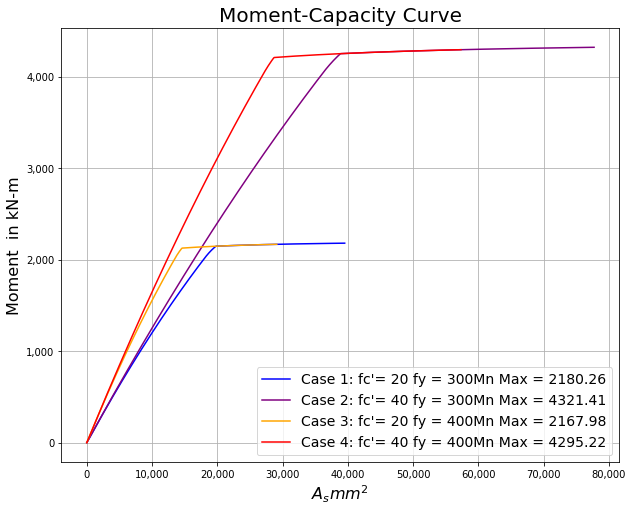

In [3]:
# Plot the curves
plt.figure(figsize=(10,8))
plt.title("Moment-Capacity Curve", fontsize=20)
plt.xlabel(r'$A_s mm^2$', fontsize=16)
plt.ylabel('Moment  in kN-m', fontsize=16)
plt.grid()

# Plot the converted values
case1, = plt.plot(As[0], M[0], label='Case 1: fc\'= '+ str(fcPrime[0]) + ' fy = ' +\
                  str(fy[0]) + 'Mn Max = ' + str(round(MnMax[0]/1000**2,2)), color='blue')
case2, = plt.plot(As[1], M[1], label='Case 2: fc\'= '+ str(fcPrime[1]) + ' fy = ' +\
                  str(fy[1]) + 'Mn Max = ' + str(round(MnMax[1]/1000**2,2)), color='purple')
case3, = plt.plot(As[2], M[2], label='Case 3: fc\'= '+ str(fcPrime[2]) + ' fy = ' +\
                  str(fy[2]) + 'Mn Max = ' + str(round(MnMax[2]/1000**2,2)), color='orange')
case4, = plt.plot(As[3], M[3], label='Case 4: fc\'= '+ str(fcPrime[3]) + ' fy = ' +\
                  str(fy[3]) + 'Mn Max = ' + str(round(MnMax[3]/1000**2,2)), color='red')

def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_formatter = tkr.FuncFormatter(func)
x_formatter = tkr.FuncFormatter(func)

ax = plt.subplot(111)
ax.yaxis.set_major_formatter(y_formatter)
ax.xaxis.set_major_formatter(x_formatter)

plt.legend(handles=[case1, case2, case3, case4], loc='best', fontsize=14)
plt.show()